<a href="https://colab.research.google.com/github/IoannisDem/SimpleDL_models/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [137]:
import torch
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice and easy way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

%matplotlib inline
import matplotlib.pyplot as plt

In [83]:
class NN(nn.Module):
  def __init__(self, input_size, num_classes):
    '''
    input_size -> flattened input size
    '''
    super(NN, self).__init__()
    self.fc1 = nn.Linear(input_size, 50) #input layer
    self.fc2 = nn.Linear(50, num_classes) # hidden layer
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [84]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print(True)

else:
  device = torch.device('cpu')

True


In [85]:
#Hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1

In [86]:
#load data

#train_dataset -> (image pixels, label) It has 60000 tuples
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True) #tranforms data to tensors (numpy when loaded)

#splits to batches (938 batches in this case, 60000/64)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

#train_dataset -> (image pixels, label) It has 10000 tuples
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True) #tranforms data to tensors (numpy when loaded)

#splits to batches (157 batches in this case, 10000/64)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [87]:
#iniitlise model
model = NN(input_size=input_size, num_classes=num_classes).to(device) #run model on available device (prefferably GPU/cuda)

In [88]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [89]:
#train network
for epoch in range(num_epochs):
  for batchidx, (data, targets) in enumerate(train_loader):
    data = data.to(device=device) #(64, 1, 28, 28) -> (batch_size, channel, (image size))
    targets = targets.to(device=device)

    data = data.reshape(data.shape[0], -1) #flatten data to (64, 784)
    
    #forward
    scores = model(data)
    loss = criterion(scores, targets)

    #backward
    optimizer.zero_grad() #set all the gradients to 0 for each batch
    loss.backward()

    #adam optimizer
    optimizer.step()


In [92]:
#check accuracy on training and test
def check_accuracy(loader, model):
  if loader.dataset.train:
    print('Checking accuracy on training data')

  else:
    print('Checking accuracy on test data')
  num_correct = 0
  num_samples = 0
  model.eval() #letting model know that we evaluate now

  with torch.no_grad(): #dotn compute any gradient in evaluation
    for x, y in loader:
      x = x.to(device=device)
      y = y.to(device=device)
      x = x.reshape(x.shape[0], -1)

      scores = model(x)
      #need to know which image of 64x10 has highest score
      _ ,predictions  =scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)
      print(
            f"Got {num_correct} / {num_samples} with accuracy"
            f" {float(num_correct) / float(num_samples) * 100:.2f}"
        )

    model.train() #return model to train

In [93]:
check_accuracy(train_loader, model)

Checking accuracy on training data
Got 60 / 64 with accuracy 93.75
Got 120 / 128 with accuracy 93.75
Got 180 / 192 with accuracy 93.75
Got 242 / 256 with accuracy 94.53
Got 304 / 320 with accuracy 95.00
Got 364 / 384 with accuracy 94.79
Got 426 / 448 with accuracy 95.09
Got 486 / 512 with accuracy 94.92
Got 549 / 576 with accuracy 95.31
Got 611 / 640 with accuracy 95.47
Got 674 / 704 with accuracy 95.74
Got 733 / 768 with accuracy 95.44
Got 790 / 832 with accuracy 94.95
Got 846 / 896 with accuracy 94.42
Got 907 / 960 with accuracy 94.48
Got 968 / 1024 with accuracy 94.53
Got 1029 / 1088 with accuracy 94.58
Got 1093 / 1152 with accuracy 94.88
Got 1148 / 1216 with accuracy 94.41
Got 1210 / 1280 with accuracy 94.53
Got 1268 / 1344 with accuracy 94.35
Got 1330 / 1408 with accuracy 94.46
Got 1389 / 1472 with accuracy 94.36
Got 1449 / 1536 with accuracy 94.34
Got 1507 / 1600 with accuracy 94.19
Got 1564 / 1664 with accuracy 93.99
Got 1626 / 1728 with accuracy 94.10
Got 1685 / 1792 with accur

In [94]:
check_accuracy(test_loader, model)

Checking accuracy on test data
Got 59 / 64 with accuracy 92.19
Got 119 / 128 with accuracy 92.97
Got 178 / 192 with accuracy 92.71
Got 238 / 256 with accuracy 92.97
Got 298 / 320 with accuracy 93.12
Got 360 / 384 with accuracy 93.75
Got 418 / 448 with accuracy 93.30
Got 476 / 512 with accuracy 92.97
Got 532 / 576 with accuracy 92.36
Got 594 / 640 with accuracy 92.81
Got 657 / 704 with accuracy 93.32
Got 718 / 768 with accuracy 93.49
Got 777 / 832 with accuracy 93.39
Got 838 / 896 with accuracy 93.53
Got 897 / 960 with accuracy 93.44
Got 954 / 1024 with accuracy 93.16
Got 1015 / 1088 with accuracy 93.29
Got 1078 / 1152 with accuracy 93.58
Got 1141 / 1216 with accuracy 93.83
Got 1199 / 1280 with accuracy 93.67
Got 1254 / 1344 with accuracy 93.30
Got 1312 / 1408 with accuracy 93.18
Got 1368 / 1472 with accuracy 92.93
Got 1429 / 1536 with accuracy 93.03
Got 1486 / 1600 with accuracy 92.88
Got 1547 / 1664 with accuracy 92.97
Got 1607 / 1728 with accuracy 93.00
Got 1668 / 1792 with accuracy 

In [144]:
#save model
path = F"/content/gdrive/My Drive/Colab Notebooks/models/epic_num_reader_torch/epic_num_reader_torch"
torch.save(model.state_dict(), path)

In [97]:
#load model
model.load_state_dict(torch.load(path))
model.eval()

NN(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

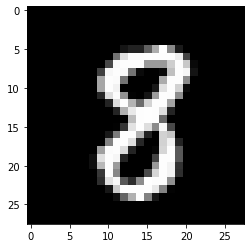

In [141]:
x, y = next(iter(test_loader)) 
img = x[0].reshape(28,28)
plt.imshow(img, cmap='gray')

In [142]:
x = x.to(device = device) #64 images 
y = y.to(device = device)
x = x.reshape(x.shape[0], -1) 
score = model(x)
print(score.shape) #64 tensors of 10 values each
print(score.max(1)[0]) #returns max value in each row 
print(score.max(1)[1]) #returns column position for each max value


torch.Size([64, 10])
tensor([ 5.3469,  7.0946,  1.1900,  3.9400,  4.0313,  7.6821,  6.0809, 10.5534,
         6.8037,  6.1308,  8.2455,  7.4123,  3.6291,  9.5198,  6.1817,  8.2842,
         5.1469,  8.6292,  6.3897,  6.0513,  6.1705,  6.6840,  6.2947,  6.7295,
         5.7567,  9.1016,  4.8754,  5.4747, 10.8798,  9.7951,  5.9683, 14.2249,
         4.7482,  7.6109,  3.7131,  5.5773,  7.4106,  5.8957,  8.6678,  8.1146,
         6.5026,  6.3633,  6.2218, 15.4331,  5.5640,  2.0523,  7.2585,  8.2083,
         2.7782,  5.3435,  4.6053,  8.2683,  8.3322,  9.4171,  9.9226,  4.7246,
         8.4024,  8.4738,  4.8575,  8.9530,  9.5001,  9.3903,  6.9397,  5.0186],
       device='cuda:0', grad_fn=<MaxBackward0>)
tensor([8, 4, 4, 9, 2, 9, 3, 0, 1, 9, 2, 8, 6, 5, 9, 7, 8, 3, 3, 2, 9, 1, 9, 7,
        8, 0, 7, 0, 0, 0, 4, 0, 8, 7, 5, 7, 7, 4, 3, 5, 5, 2, 1, 2, 5, 0, 8, 1,
        5, 2, 2, 2, 5, 7, 0, 8, 7, 4, 9, 7, 0, 0, 3, 4], device='cuda:0')


In [143]:
_, predictions = score.max(1)
print(predictions == y) #which values are correct

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
